In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier(n_jobs=1)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()


99.94916115912558% of samples were classified correctly !


In [4]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier(n_jobs=4)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()


99.94916115912558% of samples were classified correctly !


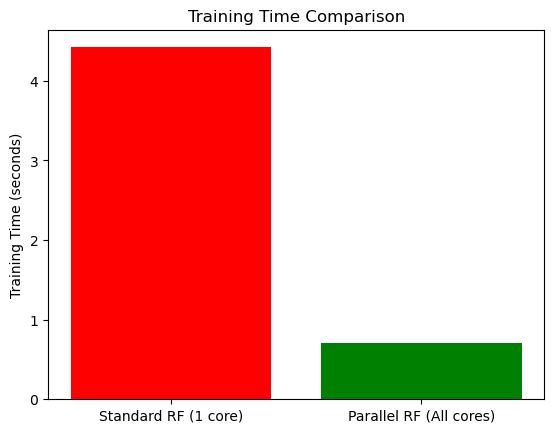

In [6]:
import time
import matplotlib.pyplot as plt

# Function to train a model and return training time
def train_model(n_jobs_value):
    model = RandomForestClassifier(n_jobs=n_jobs_value)
    start_time = time.time()
    model.fit(x_train, y_train)
    return time.time() - start_time

# Time training for standard vs. parallel RF
time_standard = train_model(n_jobs_value=1)  # No parallelism
time_parallel = train_model(n_jobs_value=-1)  # Use all cores

# Plot the results
labels = ['Standard RF (1 core)', 'Parallel RF (All cores)']
times = [time_standard, time_parallel]

plt.bar(labels, times, color=['red', 'green'])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()

1.0
1.0


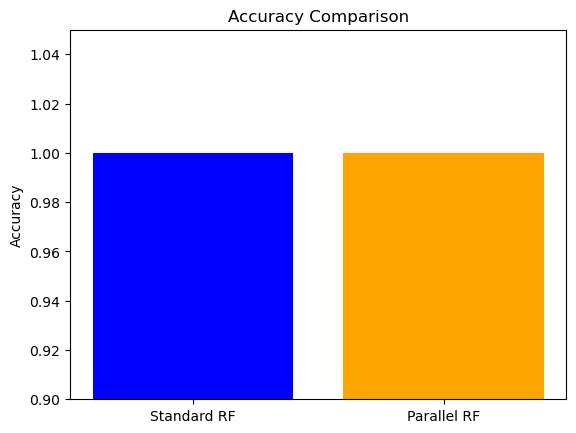

In [21]:
# Train both models and compare accuracy
model_standard = RandomForestClassifier(n_jobs=1).fit(x_train, y_train)
model_parallel = RandomForestClassifier(n_jobs=-1).fit(x_train, y_train)

acc_standard = accuracy_score(y_test, model_standard.predict(x_test))
acc_parallel = accuracy_score(y_test, model_parallel.predict(x_test))
print(acc_standard)
print(acc_parallel)
# Plot accuracy
plt.bar(['Standard RF', 'Parallel RF'], [acc_standard, acc_parallel], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05)  # Set y-axis limits for clarity
plt.title('Accuracy Comparison')
plt.show()

TIME TAKEN BY 1 core: 4.361520051956177 s
TIME TAKEN BY 2 core: 2.2694060802459717 s
TIME TAKEN BY 4 core: 1.172252893447876 s
TIME TAKEN BY 8 core: 0.885565996170044 s


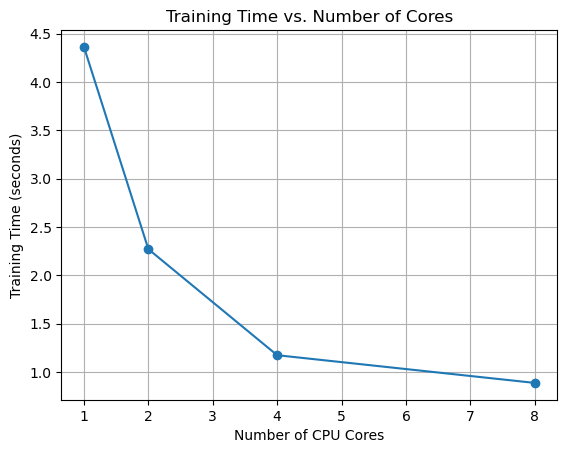

In [33]:
cores = [1, 2, 4, 8]  # Adjust based on your CPU
times = []

for n in cores:
    time_taken = train_model(n_jobs_value=n)
    times.append(time_taken)
    print('TIME TAKEN BY {} core: {} s'.format(n, time_taken))

plt.plot(cores, times, marker='o')
plt.xlabel('Number of CPU Cores')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Cores')
plt.grid(True)
plt.show()

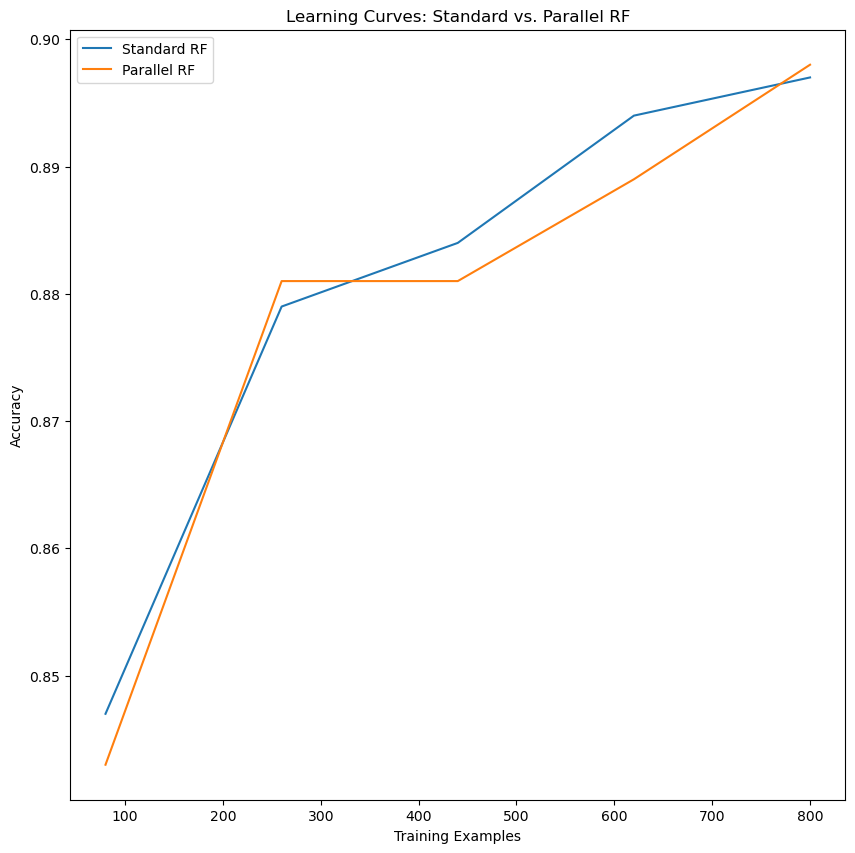

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

# Create example dataset
data, labels = make_classification(n_samples=1000, n_features=20, random_state=42)

def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, data, labels, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=title)

# Compare learning curves
plt.figure(figsize=(10, 10))
plot_learning_curve(RandomForestClassifier(n_jobs=1), 'Standard RF')
plot_learning_curve(RandomForestClassifier(n_jobs=-1), 'Parallel RF')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Standard vs. Parallel RF')
plt.legend()
plt.show()
